# Python Homework 1 - The challenge

Take the python challenge found on www.pythonchallenge.com/.
You will copy this notebook.  Rename it as:
YOURLASTNAME-FIRSTINITIAL-python-challenge-xx-Sept-2017

with your name replacing your last name and first initial and the xx replaced by the date you started or submitted.

Do the first 10 challenges and put each question and your python solution and the final resulting url in this notebook or a series of connected notebooks.
Discuss your attempt what parts of python were you using.

Upload your completed jupyter notebook zip file to elearning site as your homework submission.  Do not put this notebook on your github.

 Note: 3 points for 10 correct answers...  4 points for 15 and 5 points for all 33 


### Python challenge question 1

This challenge is straight forward. It hints to change URL and so I tried to change the URL to "http://www.pythonchallenge.com/pc/def/1.html". The URL showed the message "2**38 is much much larger", from which I got the clue.

In [69]:
#http://www.pythonchallenge.com/pc/def/0.html

print(2**38)
print(pow(2,38))

#http://www.pythonchallenge.com/pc/def/map.html

274877906944
274877906944


### Python challenge question 2

I changed the URL to "http://www.pythonchallenge.com/pc/def/274877906944.html" which redirected to "http://www.pythonchallenge.com/pc/def/map.html". This challenge has a picture with letters on i and a text below it. It can be seen that the letters on the right are two characters after the letters on the left, (K->M, O->Q, E->G) and so got the clue that all the letters in the text must be moved by 2 letters. I googled "mapping characters in python" and found that there is a function called "str.maketrans" in the library "string". 

In [81]:
#http://www.pythonchallenge.com/pc/def/274877906944.html
#http://www.pythonchallenge.com/pc/def/map.html

import string

inp="abcdefghijklmnopqrstuvwxyz"
outp="cdefghijklmnopqrstuvwxyzab"
trans=str.maketrans(inp, outp)

strg = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."
print(strg.translate(trans))

print ("map".translate(trans))  #Apply the function on "map"

#http://www.pythonchallenge.com/pc/def/ocr.html

i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url.
ocr


### Python challenge question 3

I then changed the URL to "http://www.pythonchallenge.com/pc/def/ocr.html". This challenge shows a picture of a book and it says to recognize the characters, giving a clue to check the page source. When I checked it, I found  big block of characters in the page source which I thought should be read into python using "urllib" library. There are already functions that look for specific patterns using regular expressions.

In [71]:
#http://www.pythonchallenge.com/pc/def/ocr.html

import urllib.request
url_ocr = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/ocr.html").read().decode()
#print(url_ocr)

import re
content = re.findall("<!--(.*?)-->", url_ocr, re.S)[-1]   #findall() matches all occurrences of a pattern
                                                          #re.S makes the '.' special character match any character at all, including a newline; without this flag, '.' will match anything except a newline.
print(re.findall("[A-Za-z]", content))    

#http://www.pythonchallenge.com/pc/def/equality.html

['e', 'q', 'u', 'a', 'l', 'i', 't', 'y']


### Python challenge question 4

Then, I changed the URL to "http://www.pythonchallenge.com/pc/def/equality.html" and there is text which says "One small letter, surrounded by EXACTLY three big bodyguards on each of its sides". I checked the page source to find any other clues and there is a big block of text, just as previous challenge. 

With a little thought, I guessed that I should look for characters in the pattern of "one small letter" surrounded by "three capital letters" on both the sides. 

In [72]:
#http://www.pythonchallenge.com/pc/def/equality.html

import urllib.request
url_eq = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/equality.html").read().decode()

import re
data = re.findall("<!--(.*?)-->", url_eq, re.S)[-1]   #findall() matches all occurrences of a pattern
                                                      #re.S makes the '.' special character match any character at all, including a newline; without this flag, '.' will match anything except a newline.

print(re.findall("[^A-Z]+[A-Z]{3}([a-z])[A-Z]{3}[^A-Z]+", data))
#The first part is ^A-Z means that the first character should be anything but a capital A through Z. The next three characters must be a capital letter A thorugh Z, denoted by the {3}. 
#The next element must be a lower case a through z. Again three more upper case A through Z elements. And finally the first part repeats. 

print("".join(re.findall("[^A-Z]+[A-Z]{3}([a-z])[A-Z]{3}[^A-Z]+", data)))   #Joins the list with no space inbetween.

#http://www.pythonchallenge.com/pc/def/linkedlist.php

['l', 'i', 'n', 'k', 'e', 'd', 'l', 'i', 's', 't']
linkedlist


### Python challenge question 5

For the next challenge, I changed the URL to "http://www.pythonchallenge.com/pc/def/linkedlist.html" but it showed text "linkedlist.php". So, I changed the URL to "http://www.pythonchallenge.com/pc/def/linkedlist.php". When I checked the page source, it has "urllib may help. DON'T TRY ALL NOTHINGS, since it will never end. 400 times is more than enough."

There is another link "linkedlist.php?nothing=12345", which when I clicked took me to a page with text "and the next nothing is 44827". I tried to chage the "next nothing" on the URL to the numbers it suggested, it gave me other numbers. 

I thought that this is about web pages, and from the text it showed, I guessed there are a lot of webpages. It also gave a clue to use urllib.

I tried to print all the numbers it was generating and at one point, it stopped at "and the next nothing is 16044" and 
"Yes. Divide by two and keep going". So, I divided the number 16044 by 2 and kept on printing until it gave "peak.html". 

In [73]:
#http://www.pythonchallenge.com/pc/def/linkedlist.php

import urllib
import re

url_ll = ("http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing=%s")
num="12345"
#num=16044/2

while num!="":
    data = urllib.request.urlopen(url_ll % num).read().decode()
    #print(data)
    num = "".join(re.findall("and the next nothing is (\d+)",data))
else :
    print("Came to an End")  
    
num=16044/2

while num!="":
    data = urllib.request.urlopen(url_ll % num).read().decode()
    print(data)
    num = "".join(re.findall("and the next nothing is (\d+)",data))
else :
    print("Came to an End")
    
#http://www.pythonchallenge.com/pc/def/peak.html

Came to an End
and the next nothing is 25357
and the next nothing is 89879
and the next nothing is 80119
and the next nothing is 50290
and the next nothing is 9297
and the next nothing is 30571
and the next nothing is 7414
and the next nothing is 30978
and the next nothing is 16408
and the next nothing is 80109
and the next nothing is 55736
and the next nothing is 15357
and the next nothing is 80887
and the next nothing is 35014
and the next nothing is 16523
and the next nothing is 50286
and the next nothing is 34813
and the next nothing is 77562
and the next nothing is 54746
and the next nothing is 22680
and the next nothing is 19705
and the next nothing is 77000
and the next nothing is 27634
and the next nothing is 21008
and the next nothing is 64994
and the next nothing is 66109
and the next nothing is 37855
and the next nothing is 36383
and the next nothing is 68548
and the next nothing is 96070
and the next nothing is 83051
and the next nothing is 58026
and the next nothing is 447

### Python challenge question 6

For the next challenge, I changed the URL to "http://www.pythonchallenge.com/pc/def/peak.html" which showed a picture of a hill with the text “pronounce it”. When I checked the page source, it showed some text "peak hell sounds familiar ?" and a file named "banner.p" which again took me to "http://www.pythonchallenge.com/pc/def/banner.p" and it has some text in it.

I changed the URL to "peakhell.html" but nothing showed up. I googled "peakhell" and there were results regarding the Python Challenge itself and found that it was refering to a Python object serialization module called "pickle".So,, I changed the URL to "http://www.pythonchallenge.com/pc/def/pickle.html" and it showed a text "yes! pickle!" which confirmed the usage of module "pickle".

I learnt quiet a few concepts regarding pickling when I googled ".p files in Python". "Pickle" is used for serializing and de-serializing a Python object structure. Any object in python can be pickled. It “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

When I checked the URL "banner.p", it showed a text which looked like output of something that has been pickled. 
I used "urllib" and "pickle" to load the file. When I checked the file, there are a list of tuples. It's like a character and the number of times it is repeated.

In [74]:
#http://www.pythonchallenge.com/pc/def/peak.html

import urllib.request
url_ban = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/banner.p")

import pickle
data = pickle.load(url_ban)  #Reads a pickled object representation from the open file object given in the constructor, and return the reconstituted object hierarchy specified therein. 
#print(data)                 #Printed a list of tuples.

for row in data:
    print("".join([r[1] * r[0] for r in row]))
    
#http://www.pythonchallenge.com/pc/def/channel.html

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

### Python challenge question 7

For the next challenge, I changed the URL to "http://www.pythonchallenge.com/pc/def/channel.html" and it showed a picture of a zipper and I felt it is something related to zip files. When I checked page source, it showed some text. I changed the URl to ".zip" and got a file with a lot of text files. I checked a couple of them, it shoed some text. I found a readme file at the end, which when I checked, has text as shown below: 

Welcome to my zipped list.
hint1: start from 90052
hint2: answer is inside the zip

I did some reading regarding "zipfile" module. Upon opening 90052.txt it said “Next nothing is 94191”. I tried to print the content in the text file and it stopped at a point and asked to collect the comments inside the zip file.
When I printed that out the message, it said "HOCKEY".

In [75]:
#http://www.pythonchallenge.com/pc/def/channel.html

import urllib
import zipfile
import re

url_ll = "http://www.pythonchallenge.com/pc/def/channel.html"
zf = zipfile.ZipFile("channel.zip", 'r')
print(zf.read("readme.txt").decode())

num = "90052"
comments = ""
while num != "" :
    data = zf.read(num + ".txt").decode()
    comments += zf.getinfo(num+".txt").comment.decode()
    num = "".join(re.findall("Next nothing is (\d+)",data))
    #print(data)
else :
    print(data)
    
print(comments)

#http://www.pythonchallenge.com/pc/def/oxygen.html

welcome to my zipped list.

hint1: start from 90052
hint2: answer is inside the zip

Collect the comments.
****************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 ***********************************************

### Python challenge question 8

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/def/hockey.html" but it gave a text saying "it's in the air. look at the letters". Then, I tried "http://www.pythonchallenge.com/pc/def/oxygen.html". It gave a picture in which the center of the picture was grey scaled from left. So, there might be something encoded in this line. I did some work on image analysis previously and so was quick enough to get the clue for this challenge.

We can get the pixels using Python Image Library, PIL. I printed the pixel values alon the width of the image at exactly half point of the height because that's where the image is grey scaled. The pixel values will be same for R,G,B if the image is greyscaled. The values of the pixels changed after 7 blocks, on observing the pixel values along the width. 

It gave a clue in the form of "smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]". The blocks were 7 pixels wide and so I took out the first number in the color given to me and printed string representing a character.

In [76]:
#http://www.pythonchallenge.com/pc/def/oxygen.html

import urllib.request
from PIL import Image
import requests
from io import BytesIO

url = "http://www.pythonchallenge.com/pc/def/oxygen.png"

img_oxy = requests.get(url)
img = Image.open(BytesIO(img_oxy.content))

width,height = img.size
print(width)
print(height)
#for w in range(width):
#    print(img.getpixel((w,height/2)))   #Prints the pixel values  at the greyscale along the width of the image.

for w in range(0,width,7):
    print(chr(img.getpixel((w,height/2))[0]), end='')  #Return the string representing a character whose Unicode code point is the integer.
    
print(''.join(map(chr, [105, 110, 116, 101, 103, 114, 105, 116, 121])))

#http://www.pythonchallenge.com/pc/def/integrity.html

629
95
smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]pe_integrity


### Python challenge question 9

For the next challenge, I changed the URL to "http://www.pythonchallenge.com/pc/def/integrity.html" which showed a picture of a bee with text "Where is the missing link?". It seemed the bee is clickable and when clicked, it asked for a a userame and password.

Also, when I checked page source, there was a text:

"un: 'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'   and
pw: 'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'"

I googled regarding this challenge as I had no idea what it's asking to do. Quickly, I found words "BZ2" and so googled regarding "bz2 in Python" and had briefly studied regarding what it does. I got a hunch that the strings that were in page source might need to be decompressed. When I did it, I got 'huge' and 'file', which are username and password. 

In [77]:
#http://www.pythonchallenge.com/pc/def/integrity.html

import bz2

usr = b"BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084"
pwd = b"BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08"

print(bz2.BZ2Decompressor().decompress(usr))  #Decompress data (a bytes-like object), returns uncompressed data as bytes.
print(bz2.BZ2Decompressor().decompress(pwd))

#http://www.pythonchallenge.com/pc/return/good.html

b'huge'
b'file'


### Python challenge question 10

For this challenge, I gave username and password previously obtained which took me to URL "http://www.pythonchallenge.com/pc/return/good.html". It has a picture of a stem with black dots. It seemed like we need to connect the dots to get the answer. Looking at page source, my intuition is correct that we need to connect dots and there are lists with numbers for 'first' and 'second'. Also, "first+second=?" seemed like a clue. So, I joined first and second and tried to draw an image with size mentioned i page source, 640 by 480. I got an image of bull.

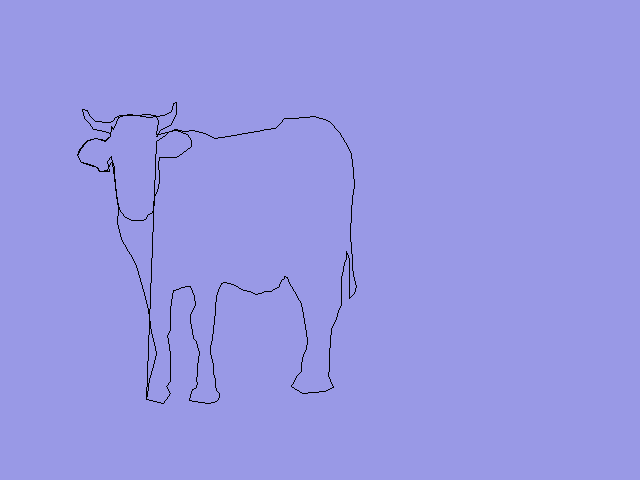

In [78]:
#http://www.pythonchallenge.com/pc/return/good.html

from PIL import Image, ImageDraw

first=[
146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399]

second=[
156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136]

all_d= first + second

img = Image.new("RGB", (640,480), "rgb(60%,60%,90%)")
pic = ImageDraw.Draw(img)
pic.line(all_d, fill='black')
img

#http://www.pythonchallenge.com/pc/return/bull.html

### Python challenge question 11

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/bull.html" and it showed a picture of a bull. In text below it says ‘len(a[30]) = ?’. When I clicked the bull, which is clickable, a new page shoed a sequence ‘a = [1, 11, 21, 1211, 111221,..]'. When I googled this sequence, I came to know that it is called the look and say sequence. With little study about it, I got to know about it and it seemed that, in the challenge, we need to find the length of the 30th element in the sequence.

In [1]:
#http://www.pythonchallenge.com/pc/return/bull.html

from itertools import groupby

def lookandsay(n):
    return (''.join(str(len(list(g))) + k
               for k,g in groupby(n)))
 
n='1'
for i in range(30):
    print("Term", i,"--", n)
    n = lookandsay(n)

type(n)
len(n)

#http://www.pythonchallenge.com/pc/return/5808.html

Term 0 -- 1
Term 1 -- 11
Term 2 -- 21
Term 3 -- 1211
Term 4 -- 111221
Term 5 -- 312211
Term 6 -- 13112221
Term 7 -- 1113213211
Term 8 -- 31131211131221
Term 9 -- 13211311123113112211
Term 10 -- 11131221133112132113212221
Term 11 -- 3113112221232112111312211312113211
Term 12 -- 1321132132111213122112311311222113111221131221
Term 13 -- 11131221131211131231121113112221121321132132211331222113112211
Term 14 -- 311311222113111231131112132112311321322112111312211312111322212311322113212221
Term 15 -- 132113213221133112132113311211131221121321131211132221123113112221131112311332111213211322211312113211
Term 16 -- 11131221131211132221232112111312212321123113112221121113122113111231133221121321132132211331121321231231121113122113322113111221131221
Term 17 -- 31131122211311123113321112131221123113112211121312211213211321322112311311222113311213212322211211131221131211132221232112111312111213111213211231131122212322211331222113112211
Term 18 -- 1321132132211331121321231231121113112221121321132122

5808

### Python challenge question 12

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/5808.html" and it showed a blurry picture with page title 'odd even'. When I checked page source, there is nothing much except cave.jpg, which when clicked got to the same image. I tried searching '"cave in python" to see if I'll find a module named 'cave' but got nothing.

I tried opening the image in "paint" and observed that the image some black pixels alternately. I had no idea where to go in this challenge and so googled regarding this challenge for some hints and got some. When I tried to check the pixels to confirm what I found when I opened the image on paint. When I used im.getpixels() to get the pixel values, the odd pixels have the image in, and the even pixels have some other image.

I tried to blank the even pixels and odd pixels alternatively to check the changes in the image. The image changed when I blanked the odd pixels to get a new image with "evil" on it.

In [ ]:
#http://www.pythonchallenge.com/pc/return/5808.html

import urllib.request
from PIL import Image
from io import StringIO

#url = 'http://www.pythonchallenge.com/pc/return/cave.jpg'
#img_cav = urllib.request.urlopen(url).read()
#img = Image.open(StringIO.StringIO(img_cav))

im = Image.open('cave.jpg')
im.size
w, h = im.size
#new = Image.new("RGB", (w, h))

print(im.getpixel((0,0)))
print(im.getpixel((0,1)))
print(im.getpixel((1,0)))
print(im.getpixel((1,1)))
print(im.getpixel((1,2)))
print(im.getpixel((1,3)))
print(im.getpixel((1,4)))
print(im.getpixel((1,5)))

for i in range(w):
    for j in range(h):
        #if (i + j) % 2 == 0:  # Blanked the even pixels
         if (i + j) % 2 == 1:  # Blanked the odd pixels
            im.putpixel((i,j), 0)

im

#http://www.pythonchallenge.com/pc/return/evil.html

### Python challenge question 13

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/evil.html" and it showed a picture of a man dealing with cards. When I checked page source, there is a link which redirected me to the URL "http://www.pythonchallenge.com/pc/return/evil1.jpg". When I changed the URL to "http://www.pythonchallenge.com/pc/return/evil2.jpg", it showed some other image that said "not jpg - .gfx". I further checked "http://www.pythonchallenge.com/pc/return/evil3.jpg", it showed an image saying "no more evils".

When I changed the URL of "evil2" to .gfx, it downloaded a file with name "evil2.gfx". The image previously showed a hand dealing with 5 cards, so the byte code generated from .gfx file is split into 5 images (googled to get this clue). Then, I got 5 images which said "dis", "pro", "port", "ional" and "ity". I first tried "disproportionality" to get to the next challenge but didnot work. O examining, I observed that "ity" is striked out in the image and so used "http://www.pythonchallenge.com/pc/return/disproportional.html" for the next challenge.

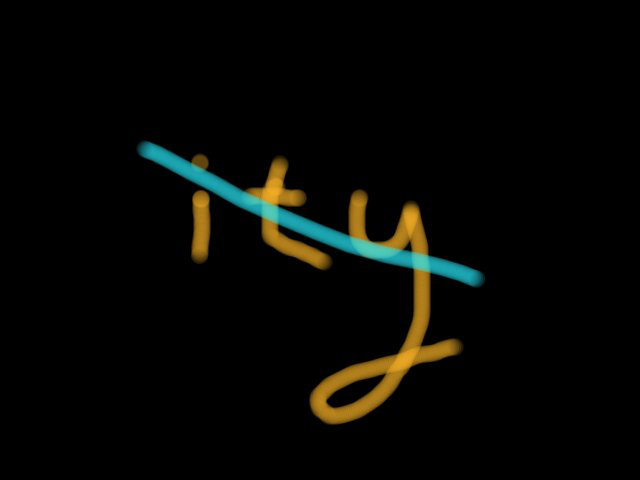

In [106]:
#http://www.pythonchallenge.com/pc/return/evil.html

import requests
from PIL import Image

#url_evl = "http://www.pythonchallenge.com/pc/return/evil2.gfx"
#un, pw = 'huge', 'file'
#d = requests.get(url_evl, auth=(un, pw)).content
#print(d)

data = open("evil2.gfx", "rb").read()
#print(data)

for i in range(0,5):
    open('%d.png' %i ,'wb').write(data[i::5])

im0 = Image.open('0.png')
im0

im1 = Image.open('1.png')
im1 

im2 = Image.open('2.png')
im2   

im3 = Image.open('3.png')
im3   

im4 = Image.open('4.png')
im4   

#http://www.pythonchallenge.com/pc/return/disproportional.html   

### Python challenge question 14

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/disproportional.html" and it gave an image with numbers on phone and text "phone that evil". The number "5" is clickable and it took me to URL "http://www.pythonchallenge.com/pc/phonebook.php" which is XML file.

On checking page source, there is a text saying "phone that <remote /> evil". I googled "remote module python" and with some digging, I found about xmlrpc client. Also previously, we know that number "5" is clickable. With these two clues, I found that there is something that needs to be done in the previous challenge that has a link to this challenge.

I tried to open evil4.jpg but nothing came. So, I read it to see if I get anything and I got "'Bert is evil! go back!". 

With xmlrpc, I found the list of methods and with a phone picture and "phonebook.php" clues, I decided to use "phone" method.
And with the clue obtained previously "Bert", I tried to use the name to get the number.

In [109]:
#http://www.pythonchallenge.com/pc/return/disproportional.html

url_evl = "http://www.pythonchallenge.com/pc/return/evil4.jpg"
un, pw = 'huge', 'file'
d = requests.get(url_evl, auth=(un, pw)).content
print(d)

import xmlrpc.client

url_pb = 'http://www.pythonchallenge.com/pc/phonebook.php'
with xmlrpc.client.ServerProxy(url_pb) as proxy:
    print(proxy.system.listMethods())

print(proxy.system.methodHelp('phone'))
print(proxy.system.methodSignature('phone'))
print(proxy.phone('Bert'))

#http://www.pythonchallenge.com/pc/return/italy.html

b'Bert is evil! go back!\n'
['phone', 'system.listMethods', 'system.methodHelp', 'system.methodSignature', 'system.multicall', 'system.getCapabilities']
Returns the phone of a person
[['string', 'string']]
555-ITALY


### Python challenge question 15

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/italy.html" and it gave an image of a roll in spiral form and other square image with vertical lines. The pagetitle is "walk around". When I checked the page source, it has a link to "http://www.pythonchallenge.com/pc/return/wire.png" which I saved.  The title has (10000 by 1) and when I checked the "wire.png" on paint, it has dimension of 10000 by 1. When I zoomed the image, there is a line.

Also, there is a text "remember: 100*100 = (100+99+99+98) + (... "

In [111]:
#http://www.pythonchallenge.com/pc/return/italy.html



#http://www.pythonchallenge.com/pc/return/uzi.html

### Python challenge question 16

For this challenge, I had to see the URL of the previous challenge. 

For the next challenge, I tried URL "http://www.pythonchallenge.com/pc/return/uzi.html" and it gave an image with calendar with year 1_6 and January 26th rounded, which is a Monday. Also, when I checked the page source, there is a text "todo: buy flowers for tomorrow" which means it is an important day. Also, the text "he ain't the youngest, he is the second" means that he is second youngest.

Also, the calendar shows February hs 29 days, so, I figured that this is a leap year. The year might be anything between 1006 and 1996. With a little digging in Python, I found that there are a couple of modules useful for this challenge "datetime" and "calendar". So, I tried to get the year, but gave 5 years, i.e, 1176, 1356, 1576, 1756 and 1976.

With the clues mentioned previously, second youngest means 1756 and so tried to use that for the next challenge, but returned nothing. Then I got a hunch from other clue "to buy flowers" and so googled the year and date to find that it was Mozart's birthday after a couple of tries with "Benjamin Franklin" too.

In [10]:
#http://www.pythonchallenge.com/pc/return/uzi.html

import datetime
import calendar

for year in range(1006, 2000, 10):
    if calendar.isleap(year) and datetime.date(year, 1, 26).weekday() == 0:
        print(year)
        

#http://www.pythonchallenge.com/pc/return/mozart.html

1176
1356
1576
1756
1976


#### Python challenge question 17

In [ ]:
#http://www.pythonchallenge.com/pc/return/mozart.html



#### Python challenge question 18

#### Python challenge question 19

#### Python challenge question 20

#### Python challenge question 21